In [1]:
import pandas as pd
import numpy as np

Series in Pandas
The pandas library contains the following useful data structures:

Series objects, that we will discuss now. A Series object is 1D array, similar to a column in a spreadsheet (with a column name and row labels).
DataFrame objects. This is a 2D table, similar to a spreadsheet (with column names and row labels).


In [2]:
# creating a series
s = pd.Series([2,5,9,8])
s

0    2
1    5
2    9
3    8
dtype: int64

In [3]:
# Series objects behave much like one-dimensional NumPy ndarrays,
#  and you can often pass them as parameters to NumPy functions:

np.exp(s)

0       7.389056
1     148.413159
2    8103.083928
3    2980.957987
dtype: float64

In [4]:
# Also we can add series with other list's,but just with same shape as in numpy
s +  [ 100,560,42,7]

0    102
1    565
2     51
3     15
dtype: int64

In [5]:
# Similar to NumPy, if you add a single number to a Series, that number is added to all items in the Series.
# This is called * broadcasting*:
s+100

0    102
1    105
2    109
3    108
dtype: int64

In [6]:
# The same is true for all binary operations such as * or /, and even conditional operations:
s < 0

0    False
1    False
2    False
3    False
dtype: bool

In [7]:
# Each item in a Series object has a unique identifier called the index label. By default, it is simply the rank of the item in
#  the Series (starting from 0) but you can also set the index labels manually:
s2 = pd.Series([54,23,71,92],index=['a','b','c','d'])
s2.head()

a    54
b    23
c    71
d    92
dtype: int64

In [8]:
s2['a']
# we can use series as dict also with labels added

54

In [9]:

s2.iloc[1:3] #also with iloc

b    23
c    71
dtype: int64

In [10]:
# But remember that you can access elements by integer location using the iloc attribute.
# This illustrates another 
# reason why it's always better to use loc and iloc to access Series objects:

In [11]:
# creating series from dict,where keys form the labels
weight={"alice": 68, "bob": 83, "colin": 86, "darwin": 68}
s3 = pd.Series(weight) 
# we can also explicitly add index to series
s3

alice     68
bob       83
colin     86
darwin    68
dtype: int64

In [12]:
# Automatic alignment 
print(s2.keys() ,"\n",  s3.keys())
s2+s3
# asnot lable is matching we get null for all here

Index(['a', 'b', 'c', 'd'], dtype='str') 
 Index(['alice', 'bob', 'colin', 'darwin'], dtype='str')


a        NaN
alice    NaN
b        NaN
bob      NaN
c        NaN
colin    NaN
d        NaN
darwin   NaN
dtype: float64

In [13]:
# Series Name
s5= pd.Series([45,67],index=['bob','alice'],name='weights')
s5

bob      45
alice    67
Name: weights, dtype: int64

In [14]:
import matplotlib.pyplot as plt

<Axes: ylabel='Frequency'>

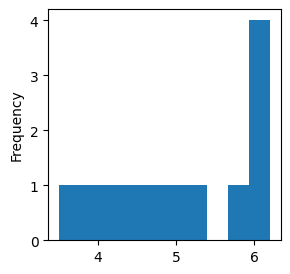

In [15]:
temp = [4.4,5.1,6.1,6.2,6.1,6.1,5.7,5.2,4.7,4.1,3.9,3.5]
s6 =pd.Series(temp)
s6.plot(kind='hist',figsize=(3,3))

Handling Time:
Many datasets have timestamps, and pandas is awesome at manipulating such data:
it can represent periods (such as 2016Q3) and frequencies (such as "monthly"),
it can convert periods to actual timestamps, and vice versa,
it can resample data and aggregate values any way you like,
it can handle timezones.

In [16]:
dates = pd.date_range('2026/10/29 5:30pm' ,periods=12 , freq ='2h')
# creating dates valuesfrom given range and periods and freq
dates

DatetimeIndex(['2026-10-29 17:30:00', '2026-10-29 19:30:00',
               '2026-10-29 21:30:00', '2026-10-29 23:30:00',
               '2026-10-30 01:30:00', '2026-10-30 03:30:00',
               '2026-10-30 05:30:00', '2026-10-30 07:30:00',
               '2026-10-30 09:30:00', '2026-10-30 11:30:00',
               '2026-10-30 13:30:00', '2026-10-30 15:30:00'],
              dtype='datetime64[us]', freq='2h')

In [17]:
# let's use datetime as index of series 
temp_series = pd.Series(temp,dates)
temp_series

2026-10-29 17:30:00    4.4
2026-10-29 19:30:00    5.1
2026-10-29 21:30:00    6.1
2026-10-29 23:30:00    6.2
2026-10-30 01:30:00    6.1
2026-10-30 03:30:00    6.1
2026-10-30 05:30:00    5.7
2026-10-30 07:30:00    5.2
2026-10-30 09:30:00    4.7
2026-10-30 11:30:00    4.1
2026-10-30 13:30:00    3.9
2026-10-30 15:30:00    3.5
Freq: 2h, dtype: float64

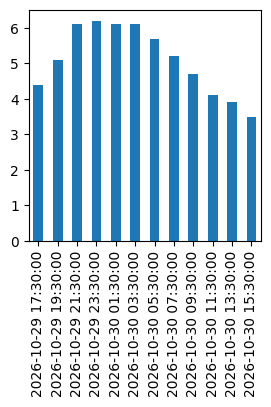

In [18]:
temp_series.plot(kind='bar',figsize=(3,3))
# plt.grid(True)
plt.show()

Resampling in Pandas Series

<Axes: >

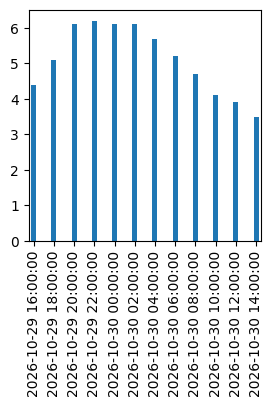

In [19]:
tr = temp_series.resample('2h')
tr.mean().plot(kind='bar',figsize=(3,3))

In [20]:
# using other aggregations 
trr = temp_series.resample("2h").min()
trr

2026-10-29 16:00:00    4.4
2026-10-29 18:00:00    5.1
2026-10-29 20:00:00    6.1
2026-10-29 22:00:00    6.2
2026-10-30 00:00:00    6.1
2026-10-30 02:00:00    6.1
2026-10-30 04:00:00    5.7
2026-10-30 06:00:00    5.2
2026-10-30 08:00:00    4.7
2026-10-30 10:00:00    4.1
2026-10-30 12:00:00    3.9
2026-10-30 14:00:00    3.5
Freq: 2h, dtype: float64

Upsampling and interpolation
It was an example of downsampling. We can also upsample (i.e. increase the frequency),
but it will create holes in our data:

In [21]:
t15min = temp_series.resample("15min").mean()
t15min

2026-10-29 17:30:00    4.4
2026-10-29 17:45:00    NaN
2026-10-29 18:00:00    NaN
2026-10-29 18:15:00    NaN
2026-10-29 18:30:00    NaN
                      ... 
2026-10-30 14:30:00    NaN
2026-10-30 14:45:00    NaN
2026-10-30 15:00:00    NaN
2026-10-30 15:15:00    NaN
2026-10-30 15:30:00    3.5
Freq: 15min, Length: 89, dtype: float64

In [22]:
# One solution is to fill the gaps by interpolating. We just call the interpolate() method.
# The default is to use linear interpolation, but we can also select another method, 
# such as cubic interpolation:
t15min = temp_series.resample("15min").interpolate(method="cubic")
t15min.head()

2026-10-29 17:30:00    4.400000
2026-10-29 17:45:00    4.412366
2026-10-29 18:00:00    4.452911
2026-10-29 18:15:00    4.518279
2026-10-29 18:30:00    4.605113
Freq: 15min, dtype: float64

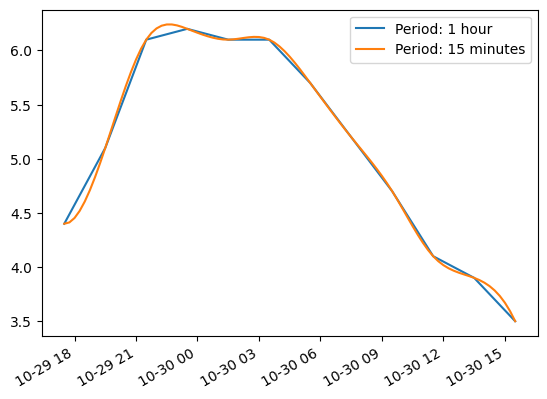

In [23]:
temp_series.plot(label="Period: 1 hour")
t15min.plot(label='Period: 15 minutes')
plt.legend()
plt.show()

In [24]:
# Timezone change_sequence
temp_series.tz_localize('Europe/Paris' , ambiguous='infer')

2026-10-29 17:30:00+01:00    4.4
2026-10-29 19:30:00+01:00    5.1
2026-10-29 21:30:00+01:00    6.1
2026-10-29 23:30:00+01:00    6.2
2026-10-30 01:30:00+01:00    6.1
2026-10-30 03:30:00+01:00    6.1
2026-10-30 05:30:00+01:00    5.7
2026-10-30 07:30:00+01:00    5.2
2026-10-30 09:30:00+01:00    4.7
2026-10-30 11:30:00+01:00    4.1
2026-10-30 13:30:00+01:00    3.9
2026-10-30 15:30:00+01:00    3.5
dtype: float64

In [25]:
# Periods 
# The pd.period_range() function returns a PeriodIndex instead of a DatetimeIndex. 
# For example, let's get all quarters in 2016 and 2017:
quarters=pd.period_range('2016Q1' , periods=8 , freq='Q')
quarters

PeriodIndex(['2016Q1', '2016Q2', '2016Q3', '2016Q4', '2017Q1', '2017Q2',
             '2017Q3', '2017Q4'],
            dtype='period[Q-DEC]')

In [26]:
# Adding a sclarer will shift quaters value of periodindex 
quarters + 3

PeriodIndex(['2016Q4', '2017Q1', '2017Q2', '2017Q3', '2017Q4', '2018Q1',
             '2018Q2', '2018Q3'],
            dtype='period[Q-DEC]')

In [27]:
# The asfreq() method lets us change the frequency of the PeriodIndex. All periods are lengthened or shortened accordingly. For example,
# let's convert all the quarterly periods to monthly periods (zooming in):
quarters.asfreq('M')


PeriodIndex(['2016-03', '2016-06', '2016-09', '2016-12', '2017-03', '2017-06',
             '2017-09', '2017-12'],
            dtype='period[M]')

In [28]:
# let's get last working dayod every month 
months = pd.period_range('2026',periods=12,freq='M')
add_one_day = months.asfreq('D') +1
last_day = add_one_day.to_timestamp() - pd.tseries.offsets.BDay()
last_day.to_period('h') +9


PeriodIndex(['2026-01-30 09:00', '2026-02-27 09:00', '2026-03-31 09:00',
             '2026-04-30 09:00', '2026-05-29 09:00', '2026-06-30 09:00',
             '2026-07-31 09:00', '2026-08-31 09:00', '2026-09-30 09:00',
             '2026-10-30 09:00', '2026-11-30 09:00', '2026-12-31 09:00'],
            dtype='period[h]')

DataFrame Objects

A DataFrame object represents a spreadsheet, with cell values, column names and row index labels. You can define expressions to compute columns based on other columns, create pivot-tables, group rows, draw graphs, etc. You can see DataFrames as dictionaries of Series.

In [29]:
people = {
    "weight": pd.Series([68, 83, 112], index=["alice", "bob", "charles"]),
    "birthyear": pd.Series([1984, 1985, 1992], index=["bob", "alice", "charles"], name="year"),
    "children": pd.Series([0, 3], index=["charles", "bob"]),
    "hobby": pd.Series(["Biking", "Dancing"], index=["alice", "bob"]),
}

ppl = pd.DataFrame(people)
ppl

,weight,birthyear,children,hobby
alice,68,1985,NaN,Biking
bob,83,1984,3.0,Dancing
charles,112,1992,0.0,NaN


In [30]:
ppl.index

Index(['alice', 'bob', 'charles'], dtype='str')

In [31]:
# getting multiple column at once: remember two square brackets here
ppl[['weight','hobby']]

,weight,hobby
alice,68,Biking
bob,83,Dancing
charles,112,NaN


In [32]:
# to add missing values we can sue np.null or else masked arrays in numpy
d5 = pd.DataFrame(
  {
    ("public", "birthyear"):
        {("Paris","alice"): 1985, ("Paris","bob"): 1984, ("London","charles"): 1992},
    ("public", "hobby"):
        {("Paris","alice"): "Biking", ("Paris","bob"): "Dancing"},
    ("private", "weight"):
        {("Paris","alice"): 68, ("Paris","bob"): 83, ("London","charles"): 112},
    ("private", "children"):
        {("Paris", "alice"): np.nan, ("Paris","bob"): 3, ("London","charles"): 0}
  }
)
d5

public          private         
               birthyear    hobby  weight children
Paris  alice        1985   Biking      68      NaN
       bob          1984  Dancing      83      3.0
London charles      1992      NaN     112      0.0

In [33]:
d5.columns

MultiIndex([( 'public', 'birthyear'),
            ( 'public',     'hobby'),
            ('private',    'weight'),
            ('private',  'children')],
           )

In [34]:
d5['public' , "hobby"]

Paris   alice       Biking
        bob        Dancing
London  charles        NaN
Name: (public, hobby), dtype: str

In [35]:
# There are two levels of columns, and two levels of indices. We can drop a column level by calling droplevel() (the same goes for indices):
d5.columns = d5.columns.droplevel(level=0)
d5

birthyear    hobby  weight  children
Paris  alice         1985   Biking      68       NaN
       bob           1984  Dancing      83       3.0
London charles       1992      NaN     112       0.0

Transposing
You can swap columns and indices using the T attribute:

In [36]:
d6= d5.T
d6

Paris           London
            alice      bob charles
birthyear    1985     1984    1992
hobby      Biking  Dancing     NaN
weight         68       83     112
children      NaN      3.0     0.0

Stacking and unstacking levels 

Calling the stack() method will push the lowest column level after the lowest index:

In [37]:
d7 = d6.iloc[[0]].stack()
d7
# Note that many NaN values appeared. 
# This makes sense because many new combinations did not exist before (e.g. there was no bob in London).
# Calling unstack() will do the reverse, once again creating many NaN values.

Paris London
birthyear alice    1985    NaN
          bob      1984    NaN
          charles   NaN   1992

In [38]:
d8 = d7.unstack()
d8

Paris               London             
          alice   bob charles  alice  bob charles
birthyear  1985  1984     NaN    NaN  NaN    1992

In [39]:
d9=d8.unstack()
d9

Paris   alice    birthyear    1985
        bob      birthyear    1984
        charles  birthyear     NaN
London  alice    birthyear     NaN
        bob      birthyear     NaN
        charles  birthyear    1992
dtype: object

In [40]:
# The stack() and unstack() methods let you select the level to stack/unstack. You can even stack/unstack multiple levels at once: 
d10 = d9.unstack(level=(0,1))

In [41]:
d10

Paris               London             
          alice   bob charles  alice  bob charles
birthyear  1985  1984     NaN    NaN  NaN    1992

Accessing rows
The loc attribute lets you access rows instead of columns. 
The result is a Series object in
 which the DataFrame's column names are mapped to row index labels:

In [42]:
ppl

,weight,birthyear,children,hobby
alice,68,1985,NaN,Biking
bob,83,1984,3.0,Dancing
charles,112,1992,0.0,NaN


In [43]:
ppl.loc['charles']

weight        112
birthyear    1992
children      0.0
hobby         NaN
Name: charles, dtype: object

In [44]:
ppl.iloc[[1]]

,weight,birthyear,children,hobby
bob,83,1984,3.0,Dancing


In [45]:
# extracting slice of a row 
ppl.iloc[1:3]

,weight,birthyear,children,hobby
bob,83,1984,3.0,Dancing
charles,112,1992,0.0,NaN


In [46]:
ppl[np.array([True,False,True])]
# here we basically are passing boolean to extract the rows with True only 

,weight,birthyear,children,hobby
alice,68,1985,NaN,Biking
charles,112,1992,0.0,NaN


In [47]:
ppl[ppl['weight'] < 100 ]

,weight,birthyear,children,hobby
alice,68,1985,NaN,Biking
bob,83,1984,3.0,Dancing


Adding and removing columns 
dataframes behave as dictionaries od Sereis, so the following works fine :

In [48]:
ppl

,weight,birthyear,children,hobby
alice,68,1985,NaN,Biking
bob,83,1984,3.0,Dancing
charles,112,1992,0.0,NaN


In [49]:
ppl['age'] = 2018 - ppl['birthyear']
ppl['over 30'] = ppl['age']  > 30

In [50]:
birthyears = ppl.pop('birthyear')

In [51]:
del ppl['children']

In [52]:
ppl

,weight,hobby,age,over 30
alice,68,Biking,33,True
bob,83,Dancing,34,True
charles,112,NaN,26,False


In [53]:
birthyears

alice      1985
bob        1984
charles    1992
Name: birthyear, dtype: int64

In [54]:
# When you add a new column, it must have the same number of rows. Missing rows are filled with NaN, and extra rows are ignored: 
# we can insert column anywhere we want using insert function in pandas 
# insert taking paramter like index to add at , col name,listof values 
ppl.insert(2,'height',[172,168,178])

In [55]:
ppl['pets'] = [1,4,3]

Assigning new columns

You can also create new columns by calling the assign() method. Note that this returns a new DataFrame object, the original is not modified:

In [56]:
ppl.assign(
    body_mass = ppl['weight'] / (ppl['height']/100) **2,
    has_pets = ppl['pets'] > 0
)

,weight,hobby,height,age,over 30,pets,body_mass,has_pets
alice,68,Biking,172,33,True,1,22.985398,True
bob,83,Dancing,168,34,True,4,29.407596,True
charles,112,NaN,178,26,False,3,35.349072,True


In [57]:
(ppl.assign(bmi = lambda df: df['weight']/ (df['height']/100)**2)
.assign(overweight = lambda df:df['bmi'] > 25)
)

,weight,hobby,height,age,over 30,pets,bmi,overweight
alice,68,Biking,172,33,True,1,22.985398,False
bob,83,Dancing,168,34,True,4,29.407596,True
charles,112,NaN,178,26,False,3,35.349072,True


Evaluating an Expression
A great feature supported by pandas is expression evaluation. It relies on the numexpr library which must be installed.

In [58]:
ppl.eval('bmi=weight/(height/100)**2',inplace=True)
ppl

,weight,hobby,height,age,over 30,pets,bmi
alice,68,Biking,172,33,True,1,22.985398
bob,83,Dancing,168,34,True,4,29.407596
charles,112,NaN,178,26,False,3,35.349072


In [59]:
# Using query method 
ppl.query('age> 30 and hobby=="Biking"')

,weight,hobby,height,age,over 30,pets,bmi
alice,68,Biking,172,33,True,1,22.985398


In [60]:
ppl.sort_index(ascending=False)

,weight,hobby,height,age,over 30,pets,bmi
charles,112,NaN,178,26,False,3,35.349072
bob,83,Dancing,168,34,True,4,29.407596
alice,68,Biking,172,33,True,1,22.985398


In [61]:
ppl.sort_index(axis=1 ,inplace=True)

In [62]:
ppl.sort_values('height',ascending =True)

,age,bmi,height,hobby,over 30,pets,weight
bob,34,29.407596,168,Dancing,True,4,83
alice,33,22.985398,172,Biking,True,1,68
charles,26,35.349072,178,NaN,False,3,112


<Axes: xlabel='bmi'>

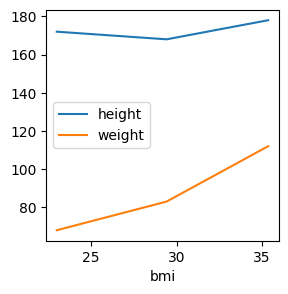

In [63]:
# Plotting a Dataframe
ppl.plot(kind='line',x='bmi',y=['height','weight'] , figsize=(3,3))

<Axes: xlabel='height', ylabel='weight'>

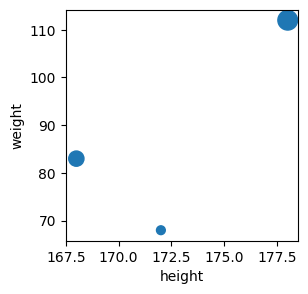

In [64]:
ppl.plot(kind='scatter' , x='height' , y='weight', s=[40,120,200] , figsize=(3,3))

Operations on DataFrames

In [65]:
grades_array = np.array([[8,8,9],[10,9,9],[4,8,2],[9,10,10]])
grades = pd.DataFrame(grades_array,columns=["sep", "oct", "nov"], index=["alice", "bob", "charles", "darwin"])
grades

,sep,oct,nov
alice,8,8,9
bob,10,9,9
charles,4,8,2
darwin,9,10,10


In [66]:
np.sqrt(grades)
# we can apply mathematical functions on Dataframe and it applies to all values 

,sep,oct,nov
alice,2.828427,2.828427,3.000000
bob,3.162278,3.000000,3.000000
charles,2.000000,2.828427,1.414214
darwin,3.000000,3.162278,3.162278


In [67]:
# broadcasting in dataframes 
grades + 3
# 3 is added to every value here, but what if categorical fields are here let's try 
# doesn't work with categorical fields only with numericals
grades['cat'] = ['dd','vv','yy','rr'] 
# similarly this works for other arithmatic operations  

In [68]:
grades

,sep,oct,nov,cat
alice,8,8,9,dd
bob,10,9,9,vv
charles,4,8,2,yy
darwin,9,10,10,rr


In [69]:
grades.drop('cat',axis=1 , inplace = True)

In [70]:
# The all method is also an aggregation operation: it checks whether all values are True or not. 
# Let's see during which months all students got a grade greater than 5
(grades > 5).all(axis=1)
# axis is where we add column or either index 

alice       True
bob         True
charles    False
darwin      True
dtype: bool

In [71]:
grades

,sep,oct,nov
alice,8,8,9
bob,10,9,9
charles,4,8,2
darwin,9,10,10


In [72]:
grades['hobby'] = ["Biking", "Dancing", np.nan, "Biking"]
grades

,sep,oct,nov,hobby
alice,8,8,9,Biking
bob,10,9,9,Dancing
charles,4,8,2,NaN
darwin,9,10,10,Biking


In [73]:
grouped_data= grades.groupby("hobby")
grouped_data

In [74]:
grouped_data.mean()

,sep,oct,nov
hobby,,,
Biking,8.5,9.0,9.5
Dancing,10.0,9.0,9.0


Pivot Tables

In [75]:
more_grades= grades.iloc[:,:3]
y = more_grades.stack().reset_index()
y.columns= ['name','grade','bonus']
# more_grades['bonus'] = [np.nan, np.nan, np.nan, 0, np.nan, 2, 3, 3, 0, 0, 1, 0]

In [83]:
# more_grades.columns 
y['marks'] = [100,50,100,45,87,65,84,91,58,64,72,87]

In [85]:
pd.pivot_table(y[['name','marks' ,'bonus']] , index='name' , values = ['bonus','marks'])

,bonus,marks
name,,
alice,8.333333,83.333333
bob,9.333333,65.666667
charles,4.666667,77.666667
darwin,9.666667,74.333333


In [88]:
tt = pd.pivot(y,index='name',columns='grade' , values = ['bonus','marks'])

In [95]:
tt.iloc[[1]].stack()

bonus  marks
name grade              
bob  nov        9     65
     oct        9     87
     sep       10     45

In [94]:
tt.stack()

bonus  marks
name    grade              
alice   nov        9    100
        oct        8     50
        sep        8    100
bob     nov        9     65
        oct        9     87
        sep       10     45
charles nov        2     58
        oct        8     91
        sep        4     84
darwin  nov       10     87
        oct       10     72
        sep        9     64

In [98]:
y.iloc[3:6] = np.nan

In [99]:
y

,name,grade,bonus,marks
0,alice,sep,8.0,100.0
1,alice,oct,8.0,50.0
2,alice,nov,9.0,100.0
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN
6,charles,sep,4.0,84.0
7,charles,oct,8.0,91.0
8,charles,nov,2.0,58.0
9,darwin,sep,9.0,64.0


In [100]:
y.describe()

,bonus,marks
count,9.000000,9.000000
mean,7.555556,78.444444
std,2.743680,18.262743
min,2.000000,50.000000
25%,8.000000,64.000000
50%,8.000000,84.000000
75%,9.000000,91.000000
max,10.000000,100.000000


In [105]:
y.ffill(inplace=True)

,name,grade,bonus,marks
0,alice,sep,8.0,100.0
1,alice,oct,8.0,50.0
2,alice,nov,9.0,100.0
3,alice,nov,9.0,100.0
4,alice,nov,9.0,100.0
5,alice,nov,9.0,100.0
6,charles,sep,4.0,84.0
7,charles,oct,8.0,91.0
8,charles,nov,2.0,58.0
9,darwin,sep,9.0,64.0


In [107]:
y.describe()

,bonus,marks
count,12.000000,12.000000
mean,7.916667,83.833333
std,2.429303,18.374059
min,2.000000,50.000000
25%,8.000000,70.000000
50%,9.000000,89.000000
75%,9.000000,100.000000
max,10.000000,100.000000


In [108]:
try:
    y.to_excel('y.xlsx' , sheet_name='Grades')
except ImportError as e:
    print(e)

SQL Joins in Dataframes

In [109]:
city_loc = pd.DataFrame(
    [
        ["CA", "San Francisco", 37.781334, -122.416728],
        ["NY", "New York", 40.705649, -74.008344],
        ["FL", "Miami", 25.791100, -80.320733],
        ["OH", "Cleveland", 41.473508, -81.739791],
        ["UT", "Salt Lake City", 40.755851, -111.896657]
    ], columns=["state", "city", "lat", "lng"])
city_loc

,state,city,lat,lng
0,CA,San Francisco,37.781334,-122.416728
1,NY,New York,40.705649,-74.008344
2,FL,Miami,25.791100,-80.320733
3,OH,Cleveland,41.473508,-81.739791
4,UT,Salt Lake City,40.755851,-111.896657


In [110]:
city_pop = pd.DataFrame(
    [
        [808976, "San Francisco", "California"],
        [8363710, "New York", "New-York"],
        [413201, "Miami", "Florida"],
        [2242193, "Houston", "Texas"]
    ], index=[3,4,5,6], columns=["population", "city", "state"])
city_pop

,population,city,state
3,808976,San Francisco,California
4,8363710,New York,New-York
5,413201,Miami,Florida
6,2242193,Houston,Texas


In [114]:
pd.merge(left=city_loc,right =city_pop ,on='city',how='outer')

,state_x,city,lat,lng,population,state_y
0,OH,Cleveland,41.473508,-81.739791,NaN,NaN
1,NaN,Houston,NaN,NaN,2242193.0,Texas
2,FL,Miami,25.791100,-80.320733,413201.0,Florida
3,NY,New York,40.705649,-74.008344,8363710.0,New-York
4,UT,Salt Lake City,40.755851,-111.896657,NaN,NaN
5,CA,San Francisco,37.781334,-122.416728,808976.0,California


In [121]:
concat = pd.concat([city_loc,city_pop],axis=0)

In [122]:
concat

,state,city,lat,lng,population
0,CA,San Francisco,37.781334,-122.416728,NaN
1,NY,New York,40.705649,-74.008344,NaN
2,FL,Miami,25.791100,-80.320733,NaN
3,OH,Cleveland,41.473508,-81.739791,NaN
4,UT,Salt Lake City,40.755851,-111.896657,NaN
3,California,San Francisco,NaN,NaN,808976.0
4,New-York,New York,NaN,NaN,8363710.0
5,Florida,Miami,NaN,NaN,413201.0
6,Texas,Houston,NaN,NaN,2242193.0


In [127]:
concat.loc[4]

,state,city,lat,lng,population
4,UT,Salt Lake City,40.755851,-111.896657,NaN
4,New-York,New York,NaN,NaN,8363710.0


Categories
It is quite frequent to have values that represent categories, for example 1 for female and 2 for male, or "A" for Good, "B" for Average, "C" for Bad. These categorical values can be hard to read and cumbersome to handle, but fortunately pandas makes it easy. To illustrate this, let's take the city_pop DataFrame we created earlier, and add a column that represents a category:

In [129]:
concat.cat

AttributeError: 'DataFrame' object has no attribute 'cat'